## QUESTION

In this file using following columns build a model to predict if person would survive or not,Pclass, Sex, Age, Fare
Calculate score of your model

In [1]:
#import all the necessary libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
data = pd.read_csv("titanic.csv")

In [3]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#data cleaning
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [6]:
#fill the missing values in the age column with the mean value
data.Age = data.Age.fillna(data.Age.mean())


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#drop the irrelevant column; specify x and y variable
X = data[["Pclass", "Sex", "Age", "Fare"]]

X

,Pclass,Sex,Age,Fare
0,3,male,22.000000,7.2500
1,1,female,38.000000,71.2833
2,3,female,26.000000,7.9250
3,1,female,35.000000,53.1000
4,3,male,35.000000,8.0500
...,...,...,...,...
886,2,male,27.000000,13.0000
887,1,female,19.000000,30.0000
888,3,female,29.699118,23.4500
889,1,male,26.000000,30.0000


In [9]:
y = data["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [10]:
#convert the Sex column to a readable form
from sklearn.preprocessing import LabelEncoder

In [11]:
le_sex=LabelEncoder()

In [12]:
X.Sex=le_sex.fit_transform(X.Sex)

In [13]:
X.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [36]:
#split the data set to test and train sets
X_train,X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=0)

In [37]:
len(X_test)

179

In [38]:
len(X_train)

712

In [41]:
#import the model library
from sklearn import tree
model=tree.DecisionTreeClassifier()

In [42]:
#fit the model
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
model.score(X_test,y_test) 

0.7877094972067039

In [44]:
#test the remaining 20% data
y_predicted=model.predict(X_test)
y_predicted

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1], dtype=int64)

In [21]:
#predict the survival of a passenger with Pclass(3),Sex (0), Age(26) Fare (7.9250)
model.predict([[3, 0,26.0, 7.9250]])


array([1], dtype=int64)

In [45]:
prediction = model.predict([[3, 0,26.0, 7.9250]])
def survival():
    if prediction==0:
        print('passenger did not survived')
    else:
        print("passenger survived")
survival()


passenger survived


# working with confusion matrix

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
#to show our confusion matrix, this entails that 82 was correctly predicted as not survived,25 not correctly predicted
#49 are correctly predcited as survived, 25 are not correctly predicted as survived
cm=confusion_matrix(y_test,y_predicted)
cm

array([[94, 16],
       [22, 47]], dtype=int64)

#### Confusion matrix visualization

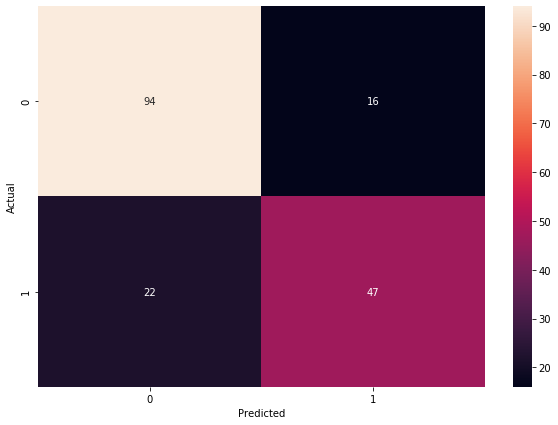

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual');


#survived =1, not survived =0

94 datapoints were correctly predicted as passengers that did not survive,while 16 datapoints where 
incorrectly predicted.  47 datapoints were correctly predicted for passengers that survived while 22 datapoints were incorrectly predicted.


